In [29]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Read the data

df = pd.read_csv('sheet1.csv', sep = ',')

In [31]:
print(df)

    obs
0     5
1     4
2     4
3     5
4     5
..  ...
95    6
96    8
97    6
98    2
99    3

[100 rows x 1 columns]


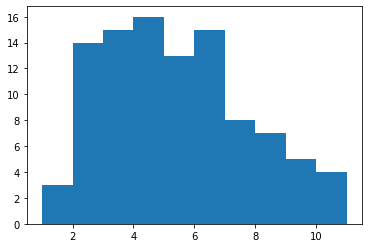

In [32]:
# plot the histogram

plt.hist(df['obs'])
plt.show()

In [33]:
# Check the statistics
df.describe()

,obs
count,100.000000
mean,4.940000
std,2.381834
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,11.000000


In [34]:
# Getting some more statistics out of the data:

stats_labels = ['Mean_Observed', 'Variance_observed', 'skew_observed', 'kurt_observed']
stats_values = [round(df['obs'].mean(),2), round(df['obs'].var(),2), round(df['obs'].skew(),2),round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

{('kurt_observed', -0.38), ('Variance_observed', 5.67), ('skew_observed', 0.51), ('Mean_Observed', 4.94)}


In [35]:
df.median()

# mean and variance is almost close to each other >> can be a poisson distribution?
# skewness is 0.51
# kurt is -0.38
# mean and median is same >> Symmetric distribution 100%

obs    5.0
dtype: float64

In [36]:
CV = 2.38/4.94
print(CV)

0.48178137651821856


In [37]:
# We dont have enough evidence that suggests its a poisson. A good way can be to go for chi square goodness of fit!!

In [38]:
# import some statistics modules

import statsmodels.api as sm
import scipy.stats as stats

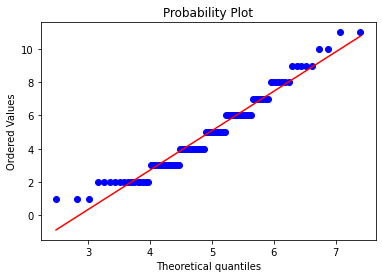

In [39]:
# lets have a look at p-p plot:
# comparing with standard normal: 

stats.probplot(df['obs'], sparams = (4.94,), plot = plt)
plt.show()

In [40]:
# this particular plot shows that the observations are not lying on straight line and are parallel to each other. So, we cant say its standard normal

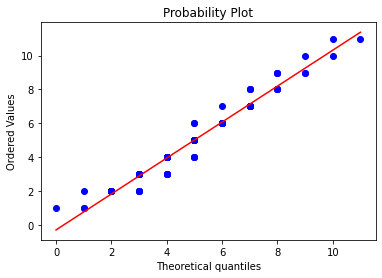

In [41]:
# lets fit with poisson and see what do we get:

stats.probplot(df['obs'], dist = 'poisson', sparams = (4.94,), plot = plt)
plt.show()

In [42]:
# the points are almost around the same line

# so we can conclude that the graph is infact poisson

Lets establish that its a poisson using statistical technique

In [43]:
# Lets create some bins:
grouped_df = pd.DataFrame()
grouped_df['frequency'] = df.groupby('obs')['obs'].count() 
print(grouped_df)

     frequency
obs           
1            3
2           14
3           15
4           16
5           13
6           15
7            8
8            7
9            5
10           2
11           2


In [44]:
grouped_df['obs_probability'] = grouped_df['frequency']/len(df)
print(grouped_df)

     frequency  obs_probability
obs                            
1            3             0.03
2           14             0.14
3           15             0.15
4           16             0.16
5           13             0.13
6           15             0.15
7            8             0.08
8            7             0.07
9            5             0.05
10           2             0.02
11           2             0.02


In [76]:
# Now calculate the theoreotical probability
from scipy import stats
from scipy.stats import poisson
from scipy.stats import chisquare

In [77]:
poisson.pmf

<bound method rv_discrete.pmf of <scipy.stats._discrete_distns.poisson_gen object at 0x7f2c772ef2b0>>

In [90]:
grouped_df
grouped_df['poisson_pmf'] = poisson.pmf(k = grouped_df.index, mu = df['obs'].mean())
grouped_df['poisson_frq'] = grouped_df['poisson_pmf']*len(df)

In [91]:
print(grouped_df)

     frequency  obs_probability  poisson_pmf  poisson_frq
obs                                                      
1            3             0.03     0.035344     3.534372
2           14             0.14     0.087299     8.729898
3           15             0.15     0.143752    14.375232
4           16             0.16     0.177534    17.753411
5           13             0.13     0.175404    17.540370
6           15             0.15     0.144416    14.441572
7            8             0.08     0.101916    10.191623
8            7             0.07     0.062933     6.293327
9            5             0.05     0.034543     3.454337
10           2             0.02     0.017064     1.706443
11           2             0.02     0.007663     0.766348


In [92]:
# round off the poisson frequecy since its a discrete random variable:

grouped_df['poisson_frq'] = [round(elem, 2) for elem in grouped_df['poisson_frq']]
print(grouped_df)

     frequency  obs_probability  poisson_pmf  poisson_frq
obs                                                      
1            3             0.03     0.035344         3.53
2           14             0.14     0.087299         8.73
3           15             0.15     0.143752        14.38
4           16             0.16     0.177534        17.75
5           13             0.13     0.175404        17.54
6           15             0.15     0.144416        14.44
7            8             0.08     0.101916        10.19
8            7             0.07     0.062933         6.29
9            5             0.05     0.034543         3.45
10           2             0.02     0.017064         1.71
11           2             0.02     0.007663         0.77


In [94]:
# This chi-squared test for goodness of fit indeed requires the sums of both inputs to be (almost) the same.
grouped_df['poisson_frq'].sum() == grouped_df['frequency'].sum()

False

In [101]:
obs = grouped_df['frequency'].sum()
exp = grouped_df['poisson_frq'].sum()
ratio = obs/exp
print(ratio)

grouped_df['expfrq'] = grouped_df['poisson_frq']*ratio
print(grouped_df)

grouped_df['expfrq'].sum() # which is nearly equal to freq sum

1.0123506782749545
     frequency  obs_probability  poisson_pmf  poisson_frq     expfrq
obs                                                                 
1            3             0.03     0.035344         3.53   3.573598
2           14             0.14     0.087299         8.73   8.837821
3           15             0.15     0.143752        14.38  14.557603
4           16             0.16     0.177534        17.75  17.969225
5           13             0.13     0.175404        17.54  17.756631
6           15             0.15     0.144416        14.44  14.618344
7            8             0.08     0.101916        10.19  10.315853
8            7             0.07     0.062933         6.29   6.367686
9            5             0.05     0.034543         3.45   3.492610
10           2             0.02     0.017064         1.71   1.731120
11           2             0.02     0.007663         0.77   0.779510


99.99999999999999

In [103]:
 obs_frq = list(grouped_df['frequency'])
 expec_frq = list(grouped_df['expfrq'])
 print(obs_frq, expec_frq)

[3, 14, 15, 16, 13, 15, 8, 7, 5, 2, 2] [3.573597894310589, 8.837821421340353, 14.557602753593846, 17.96922453938044, 17.756630896942703, 14.618343794290343, 10.315853411621786, 6.367685766349464, 3.492609840048593, 1.7311196598501721, 0.779510022271715]


Null Hypothesis: given data follows the Poisson Distribution

Alternate Hypothesis: Given data does not follow the poissson distribution

In [104]:
stats.chisquare(obs_frq, expec_frq)

Power_divergenceResult(statistic=7.806684352048819, pvalue=0.6477132278254244)

In [64]:
# whenever interpreting p value: It is basically going to tell us the probability of observing this sample when null hypothesis is true. Here porbability is almost 64%
# alpha value we give and if p value is greather than alpha then null is acceptable

In [105]:
# another way:

# tabulated chi2 value for confidence interval of 95%
# k = 11 classes / number of buckets
# p = no of parameters we estimate/compute = mean = one parameter = 1
# dof = k-p-1 = 11 - 1 - 1 = 9

import scipy.stats
scipy.stats.chi2.ppf(1-0.05, df=9)

16.918977604620448

In [106]:
# if tabulated value > Computed value then do not reject Null Hypothesis

# in our case tabulated value = 16.91 > 7.806 i.e. computed value thus we accept the null